<a href="https://colab.research.google.com/github/mars-orbiter/DAWN-Mission/blob/main/DAWN_Mission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries

In [ ]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
from pylab import rcParams
import pandas as pd

### Importing data for DAWN

In [ ]:
#DATA FOR DAWN
url = 'https://raw.githubusercontent.com/mars-orbiter/DAWN-Mission/main/DAWN/DawnFull.csv'
DawnFull_tb = pd.read_csv(url,encoding='utf-8')
pd.set_option("display.max_rows", None, "display.max_columns", None)

DawnData=DawnFull_tb*1000
DawnData.columns = ["JDTDB","Calendar_Date","X","Y","Z","VX","VY","VZ","LT","RG","RR"]
#storing values for each column into a separate list
JDTDB = np.array(DawnData.JDTDB)
Calendar_Date = np.array(DawnData.Calendar_Date)
X = np.array(DawnData.X)
Y = np.array(DawnData.Y)
Z = np.array(DawnData.Z)
VX = np.array(DawnData.VX)
VY = np.array(DawnData.VY)
VZ = np.array(DawnData.VZ)
LT = np.array(DawnData.LT)
RG = np.array(DawnData.RG)
RR = np.array(DawnData.RR)

### Importing data for Earth

In [ ]:
#DATA FOR Earth
url = 'https://raw.githubusercontent.com/mars-orbiter/DAWN-Mission/main/Earth/EarthFull.csv'
EarthFull_tb = pd.read_csv(url,encoding='utf-8')
pd.set_option("display.max_rows", None, "display.max_columns", None)

EarthData=EarthFull_tb*1000
EarthData.columns = ["JDTDB","Calendar_Date","X","Y","Z","VX","VY","VZ","LT","RG","RR"]
#storing values for each column into a separate list
JDTDB_e = np.array(EarthData.JDTDB)
Calendar_Date_e = np.array(EarthData.Calendar_Date)
X_e= np.array(EarthData.X)
Y_e = np.array(EarthData.Y)
Z_e = np.array(EarthData.Z)
VX_e = np.array(EarthData.VX)
VY_e = np.array(EarthData.VY)
VZ_e = np.array(EarthData.VZ)
LT_e = np.array(EarthData.LT)
RG_e = np.array(EarthData.RG)
RR_e = np.array(EarthData.RR)

### Importing data for Mars

In [ ]:
#DATA FOR Mars
url = 'https://raw.githubusercontent.com/mars-orbiter/DAWN-Mission/main/Mars/MarsFull.csv'
MarsFull_tb = pd.read_csv(url,encoding='utf-8')
pd.set_option("display.max_rows", None, "display.max_columns", None)

MarsData=MarsFull_tb*1000
MarsData.columns = ["JDTDB","Calendar_Date","X","Y","Z","VX","VY","VZ","LT","RG","RR"]
#storing values for each column into a separate list
JDTDB_M = np.array(MarsData.JDTDB)
Calendar_Date_M = np.array(MarsData.Calendar_Date)
X_M= np.array(MarsData.X)
Y_M = np.array(MarsData.Y)
Z_M = np.array(MarsData.Z)
VX_M = np.array(MarsData.VX)
VY_M = np.array(MarsData.VY)
VZ_M = np.array(MarsData.VZ)
LT_M = np.array(MarsData.LT)
RG_M = np.array(MarsData.RG)
RR_M = np.array(MarsData.RR)

### Importing data for Vesta

In [ ]:
#DATA FOR Vesta
url = 'https://raw.githubusercontent.com/mars-orbiter/DAWN-Mission/main/Vesta/VestaFull.csv'
VestaFull_tb = pd.read_csv(url,encoding='utf-8')
pd.set_option("display.max_rows", None, "display.max_columns", None)

VestaData=VestaFull_tb*1000
VestaData.columns = ["JDTDB","Calendar_Date","X","Y","Z","VX","VY","VZ","LT","RG","RR"]
#storing values for each column into a separate list
JDTDB_V = np.array(VestaData.JDTDB)
Calendar_Date_V = np.array(VestaData.Calendar_Date)
X_V= np.array(VestaData.X)
Y_V = np.array(VestaData.Y)
Z_V = np.array(VestaData.Z)
VX_V = np.array(VestaData.VX)
VY_V = np.array(VestaData.VY)
VZ_V = np.array(VestaData.VZ)
LT_V = np.array(VestaData.LT)
RG_V = np.array(VestaData.RG)
RR_V = np.array(VestaData.RR)

### Importing data for Ceres

In [ ]:
#DATA FOR Ceres
url = 'https://raw.githubusercontent.com/mars-orbiter/DAWN-Mission/main/ceres/CeresFull.csv'
CeresFull_tb = pd.read_csv(url,encoding='utf-8')
pd.set_option("display.max_rows", None, "display.max_columns", None)

CeresData=CeresFull_tb*1000
CeresData.columns = ["JDTDB","Calendar_Date","X","Y","Z","VX","VY","VZ","LT","RG","RR"]
#storing values for each column into a separate list
JDTDB_C = np.array(CeresData.JDTDB)
Calendar_Date_C = np.array(CeresData.Calendar_Date)
X_C= np.array(CeresData.X)
Y_C = np.array(CeresData.Y)
Z_C = np.array(CeresData.Z)
VX_C = np.array(CeresData.VX)
VY_C = np.array(CeresData.VY)
VZ_C = np.array(CeresData.VZ)
LT_C = np.array(CeresData.LT)
RG_C = np.array(CeresData.RG)
RR_C = np.array(CeresData.RR)

### Defining some parameters

In [ ]:
CalcX=[]
CalcY=[]
Thrust=np.zeros(2716)
LambdMas=np.zeros(2716)
days=np.arange(2716)+1
SunParam=132712440018*pow(10,9);
radius = m.sqrt(X[0]*X[0]+Y[0]*Y[0])
radius0 = radius
angle = m.atan(Y[0]/X[0])
V0=np.array([-3.267334027266680E+00,3.345804245220296E+01])*1000
mV0=m.sqrt(V0[0]*V0[0]+V0[1]*V0[1])
Vmars=np.array([2.239956000086868E+01, 1.417958296152212E+01])*1000
rV=(X[0]*V0[0]+Y[0]*V0[1])/radius
phiV=m.sqrt(mV0*mV0-rV*rV)
m0=747.1+425+45.6
c0=26000
fuel = 425
k = np.zeros(4)
q = np.zeros(4)
day = 0
dday = 1
mas=747.1+fuel+45.6


### Code

In [ ]:
##fly near Mars

while day < 510:
    CalcX.append(radius*m.cos(angle))
    CalcY.append(radius*m.sin(angle))
    F0=3*50*0.000
    lambd=m.pi/2
    if day > 50 and day <300:
        F0=3*90*0.001 * pow((radius0/radius),2)     
        lambd=m.pi/2+m.pi/2.6
    if day > 299 and day <500:
        F0=3*90*0.001 * pow((radius0/radius),2)     
        lambd=m.pi/2
    LambdMas[day-1]=lambd
    Thrust[day-1]=F0
    a = F0/mas
    consumption=F0/c0
    angle = angle + (phiV/radius)*dday*24*3600
    radius = radius + rV * dday*24*3600
    rV=rV+(pow(phiV,2)/radius-SunParam/pow(radius,2)+m.cos(lambd)*a)*dday*24*3600
    phiV=phiV+(-(rV*phiV)/radius+m.sin(lambd)*a)*dday*24*3600
    mas=mas-consumption*dday*24*3600
    day = day + dday 
radius = m.sqrt(X_M[-1]*X_M[-1]+Y_M[-1]*Y_M[-1])
angle = m.atan(Y_M[-1]/X_M[-1])
rV=(X_M[-1]*Vmars[0]+Y_M[-1]*Vmars[1])/radius
mV0=m.sqrt(Vmars[0]*Vmars[0]+Vmars[1]*Vmars[1])
phiV=m.sqrt(mV0*mV0-rV*rV)
V=m.sqrt(phiV*phiV+rV*rV)/1000

##fly to Vesta

while day > 509 and day < 1357:
    CalcX.append(radius*m.cos(angle))
    CalcY.append(radius*m.sin(angle))
    F0=3*50*0.000
    lambd=m.pi/2
    if day > 723 and day <1250:
        F0=3*90*0.001 * pow((radius0/radius),2)      
        lambd=m.pi/2+m.pi/200
    LambdMas[day-1]=lambd
    Thrust[day-1]=F0
    a = F0/mas
    consumption=F0/c0
    angle = angle + (phiV/radius)*dday*24*3600
    radius = radius + rV * dday*24*3600
    rV=rV+(pow(phiV,2)/radius-SunParam/pow(radius,2)+m.cos(lambd)*a)*dday*24*3600
    phiV=phiV+(-(rV*phiV)/radius+m.sin(lambd)*a)*dday*24*3600
    mas=mas-consumption*dday*24*3600
    day = day + dday 
V=m.sqrt(phiV*phiV+rV*rV)/1000

##around Vesta
while day > 1356 and day < 1804:
     lambd=m.pi/2
     LambdMas[day-1]=lambd
     CalcX.append(X[day])
     CalcY.append(Y[day])
     day = day + dday

##fly to Ceres
Vvesta=np.array([-1.430410330851633E+01, 1.056459146838846E+01])*1000
radius = m.sqrt(X[1804]*X[1804]+Y[1804]*Y[1804])
angle = m.atan(Y[1804]/X[1804])
rV=(X[1804]*Vvesta[0]+Y[1804]*Vvesta[1])/radius
mV0=m.sqrt(Vvesta[0]*Vvesta[0]+Vvesta[1]*Vvesta[1])
phiV=m.sqrt(mV0*mV0-rV*rV)
V=m.sqrt(phiV*phiV+rV*rV)/1000

while day > 1803 and day < 2716:
    CalcX.append(radius*m.cos(angle))
    CalcY.append(radius*m.sin(angle))
    F0=3*50*0.000
    lambd=m.pi/2
    if day > 1890 and day <2300:
        F0=3*90*0.001 * pow((radius0/radius),2)      
        lambd=m.pi/2
    LambdMas[day-1]=lambd
    Thrust[day-1]=F0
    a = F0/mas
    consumption=F0/c0
    angle = angle + (phiV/radius)*dday*24*3600
    radius = radius + rV * dday*24*3600
    rV=rV+(pow(phiV,2)/radius-SunParam/pow(radius,2)+m.cos(lambd)*a)*dday*24*3600
    phiV=phiV+(-(rV*phiV)/radius+m.sin(lambd)*a)*dday*24*3600
    mas=mas-consumption*dday*24*3600
    day = day + dday 
V=m.sqrt(phiV*phiV+rV*rV)/1000

### Generating plots

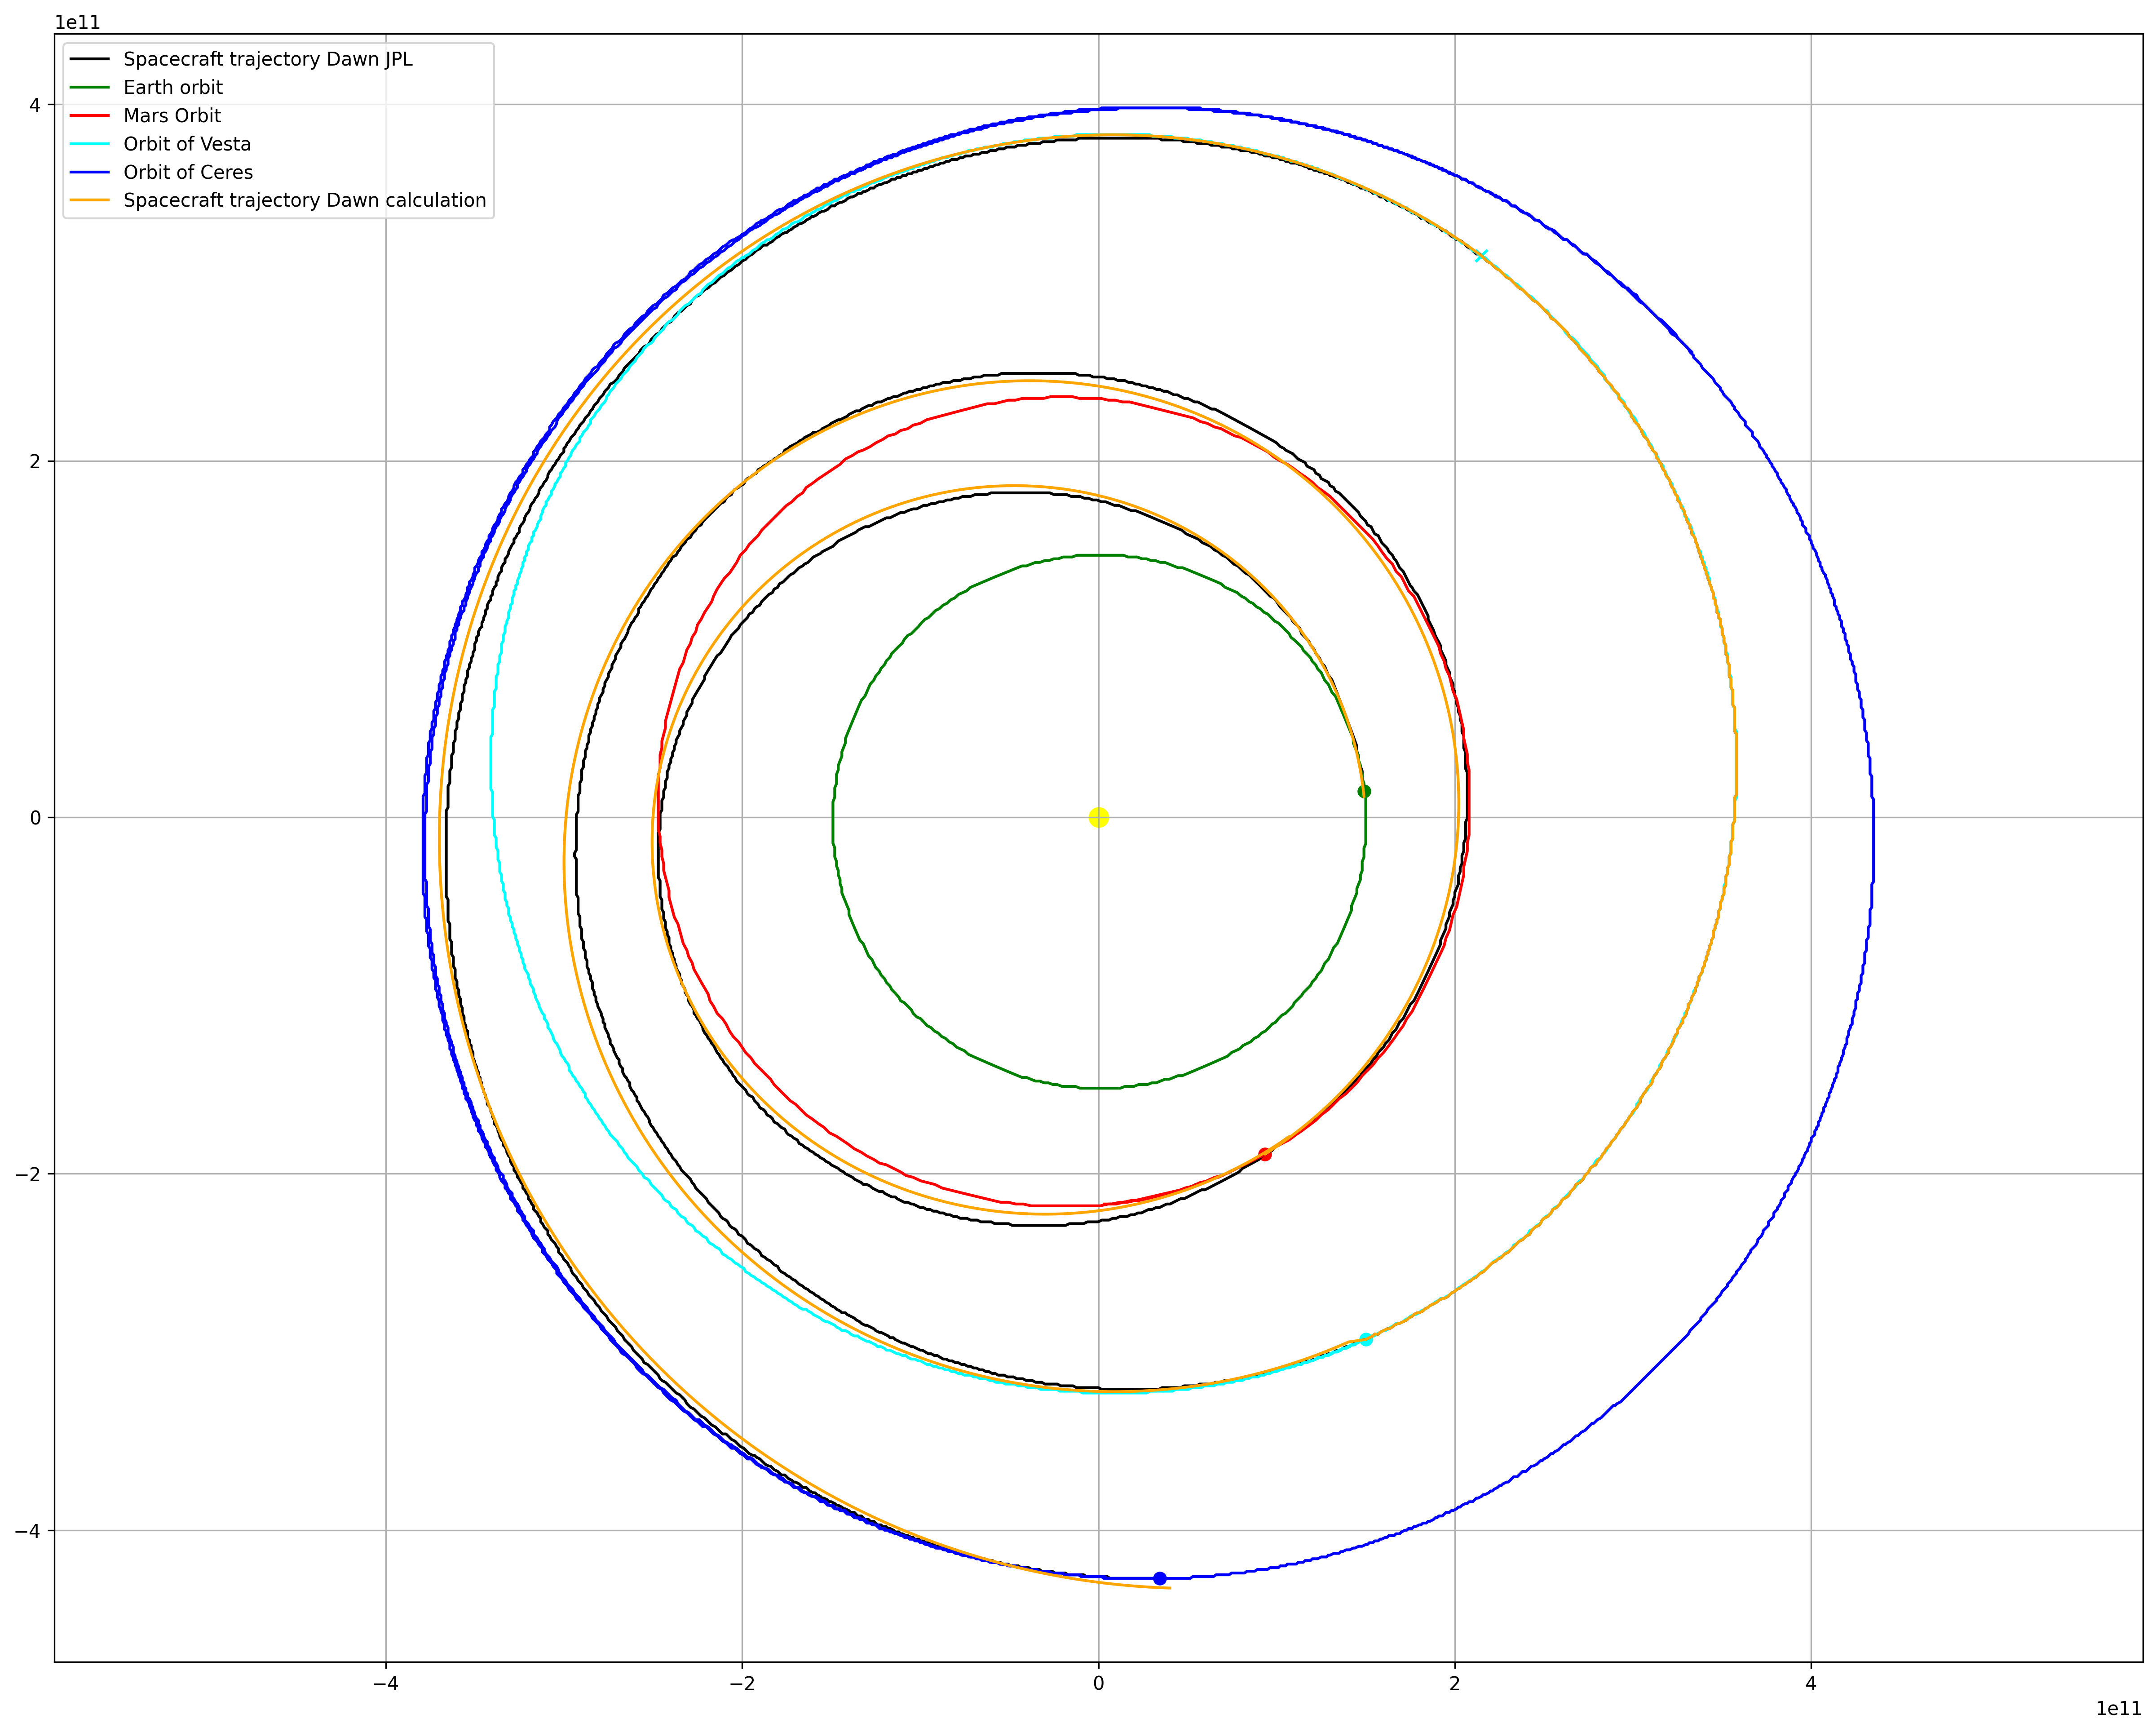

In [ ]:
#PLOTTING GRAPHS
plt.plot(X,Y,color='black',label='Spacecraft trajectory Dawn JPL')
plt.scatter(0,0, color='yellow', s=100, marker='o')
plt.scatter(X[1],Y[1], color='green', s=40, marker='o')

plt.plot(X_e,Y_e,color='green',label='Earth orbit')

plt.plot(X_M,Y_M,color='red',label='Mars Orbit')
plt.scatter(X_M[-1],Y_M[-1], color='red', s=40, marker='o')

plt.plot(X_V,Y_V,color='cyan',label='Orbit of Vesta')
plt.scatter(X_V[-1],Y_V[-1], color='cyan', s=40, marker='o')

plt.plot(X_C,Y_C,color='blue',label='Orbit of Ceres')
plt.scatter(X_C[2715],Y_C[2715], color='blue', s=40, marker='o')

plt.scatter(X[1804],Y[1804], color='cyan', s=40, marker='x')
plt.plot(CalcX,CalcY,color='orange',label='Spacecraft trajectory Dawn calculation')

rcParams['figure.figsize'] = 20,16
rcParams["figure.dpi"] = 900
plt.legend(loc=2)
plt.axis('equal')
plt.xlim([1, 2714])
plt.grid()
plt.show()

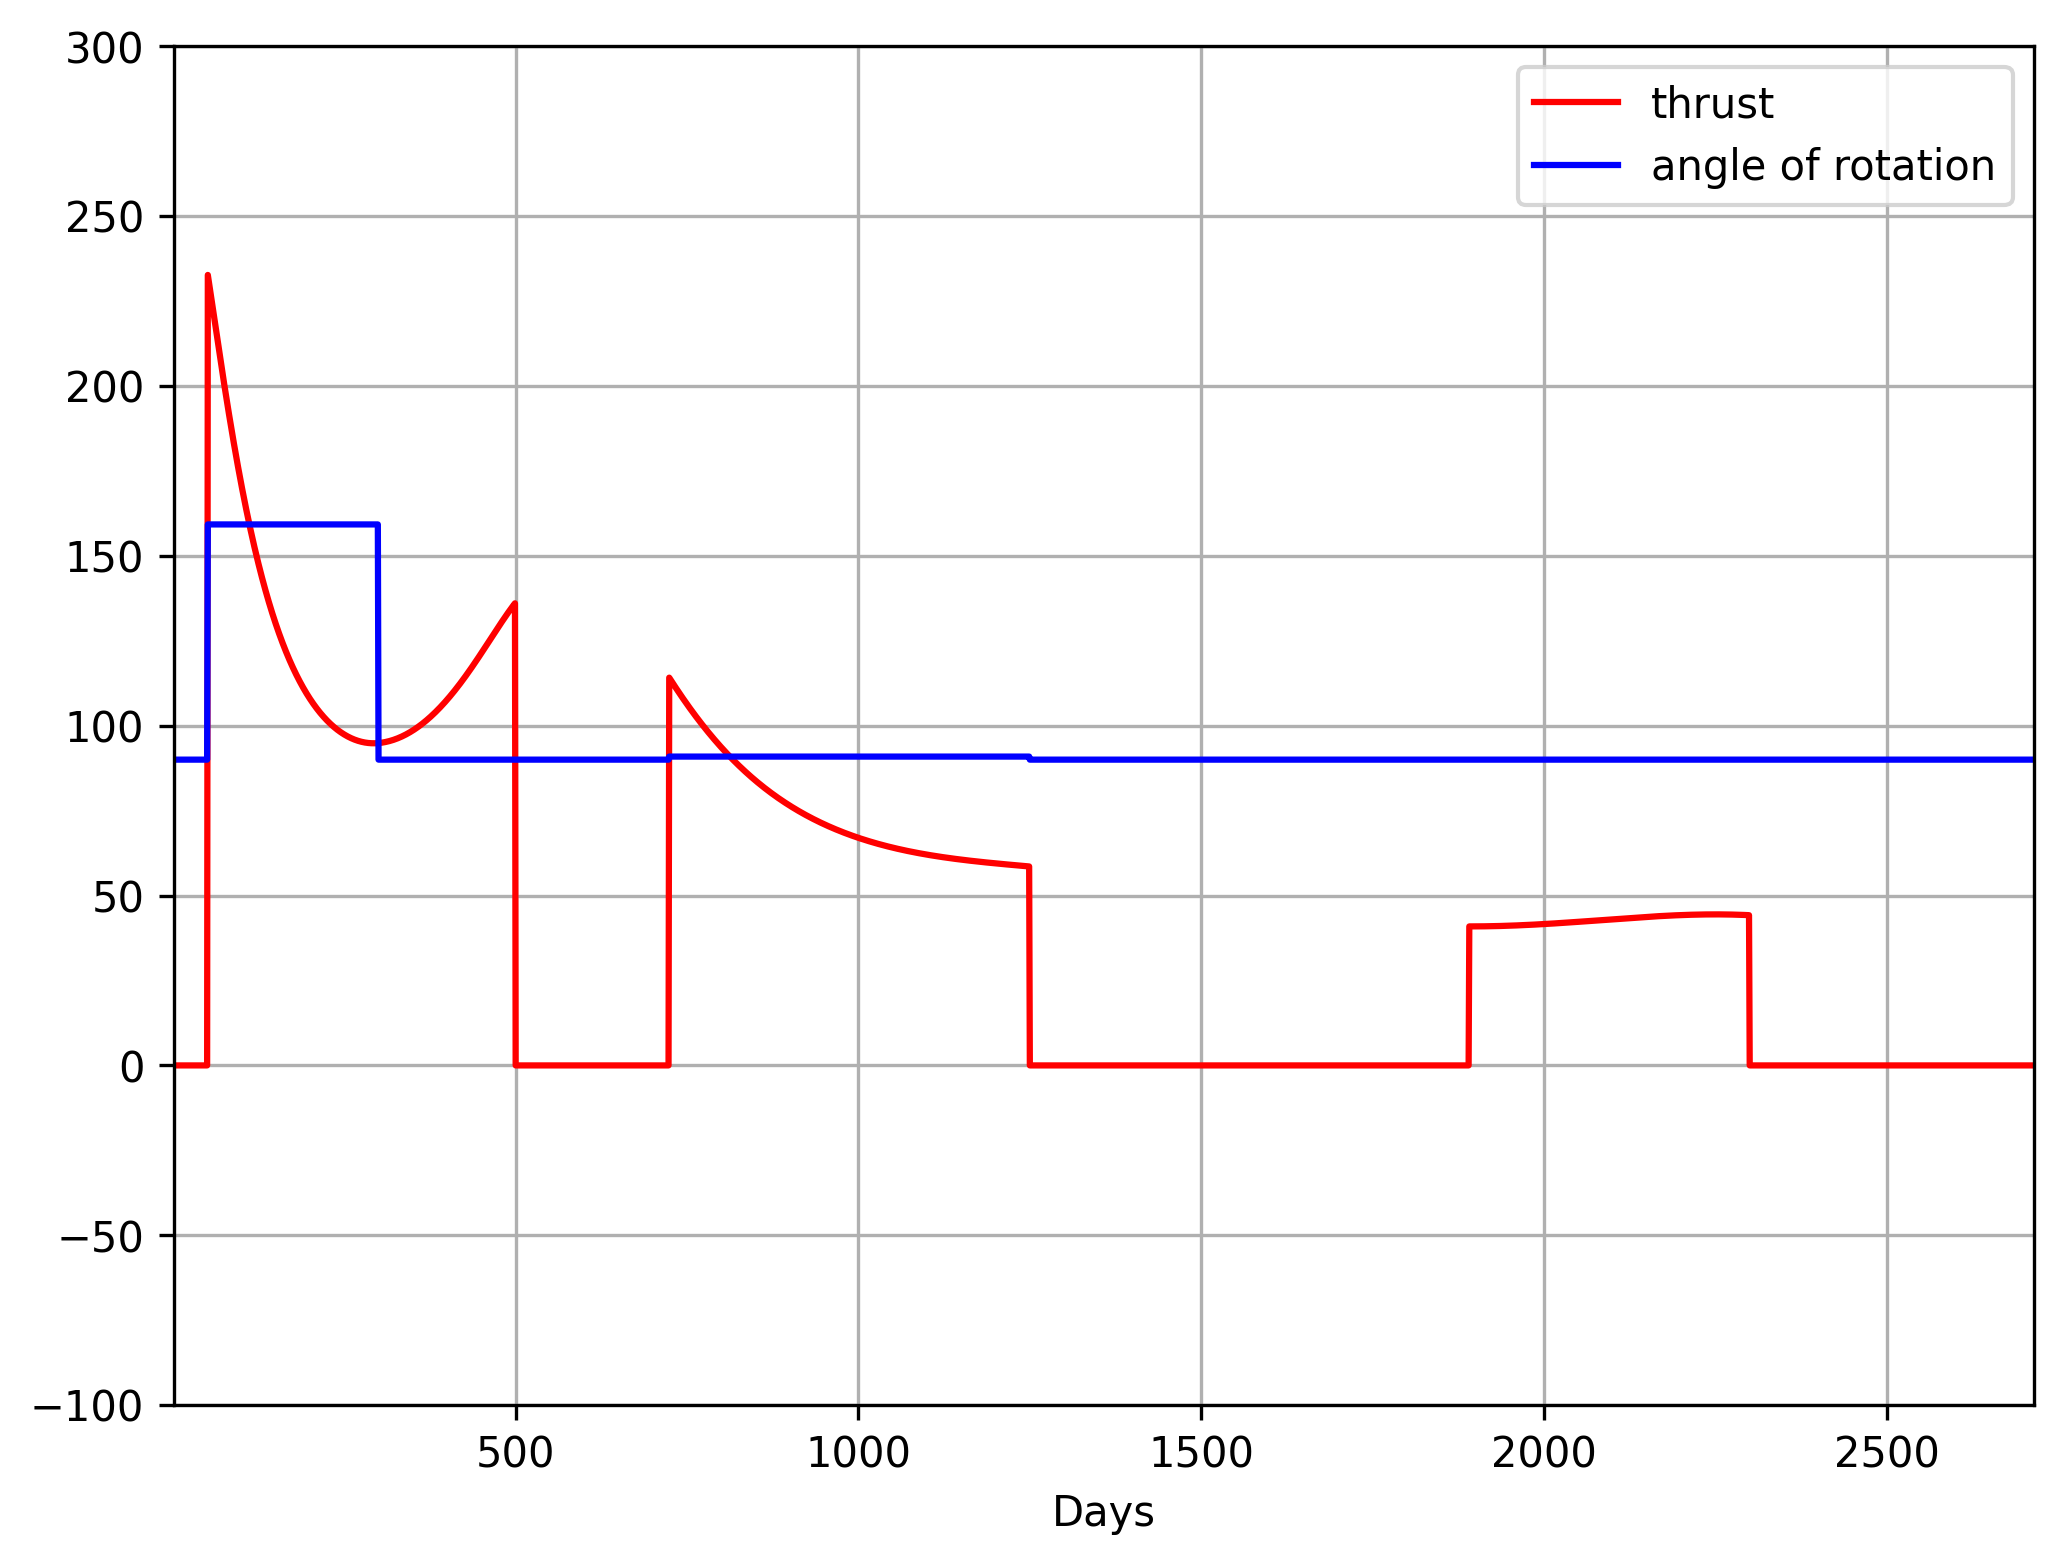

In [ ]:
plt.plot(days,Thrust*1000,'red',label = "thrust")
plt.plot(days,LambdMas*180/np.pi,'blue',label = "angle of rotation")

rcParams['figure.figsize'] = 6,4
rcParams["figure.dpi"] = 100 
plt.xlabel("Days")
plt.xlim([1, 2714])
plt.ylim([-100, 300])
plt.legend()
plt.grid()
plt.show()